In [52]:
from pycocotools.coco import COCO
import pickle
import os
import cv2
import matplotlib.pyplot as plt
import pycocotools.mask as maskUtils
import copy

%cd ~/Desktop/projects/sam_whistle



/home/xzhang3906/Desktop/projects/sam_whistle


In [53]:
def mask_to_polygons(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    segmentation = []
    valid_poly = 0
    for contour in contours:
    # Valid polygons have >= 6 coordinates (3 points)
        if contour.size >= 6:
            segmentation.append(contour.astype(float).flatten().tolist())
            valid_poly += 1
    if valid_poly == 0:
        raise ValueError
    return segmentation

In [54]:
data_dir = 'data/dclde/spec_coco/val/data'
with open('outputs/dt_result_sam.pkl', 'rb') as f:
    coco_dt = pickle.load(f)
gt_coco = COCO('data/dclde/spec_coco/val/labels.json')
box_coco, mask_coco = coco_dt['bbox'], coco_dt['mask']

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


In [55]:
img_info = gt_coco.imgs[list(gt_coco.imgs.keys())[5]]
img_info

{'id': 445,
 'width': 1500,
 'height': 769,
 'file_name': 'Qx-Dc-SC03-TAT09-060516-173000_21000.png',
 'audio_filename': 'Qx-Dc-SC03-TAT09-060516-173000',
 'start_frame': 21000}

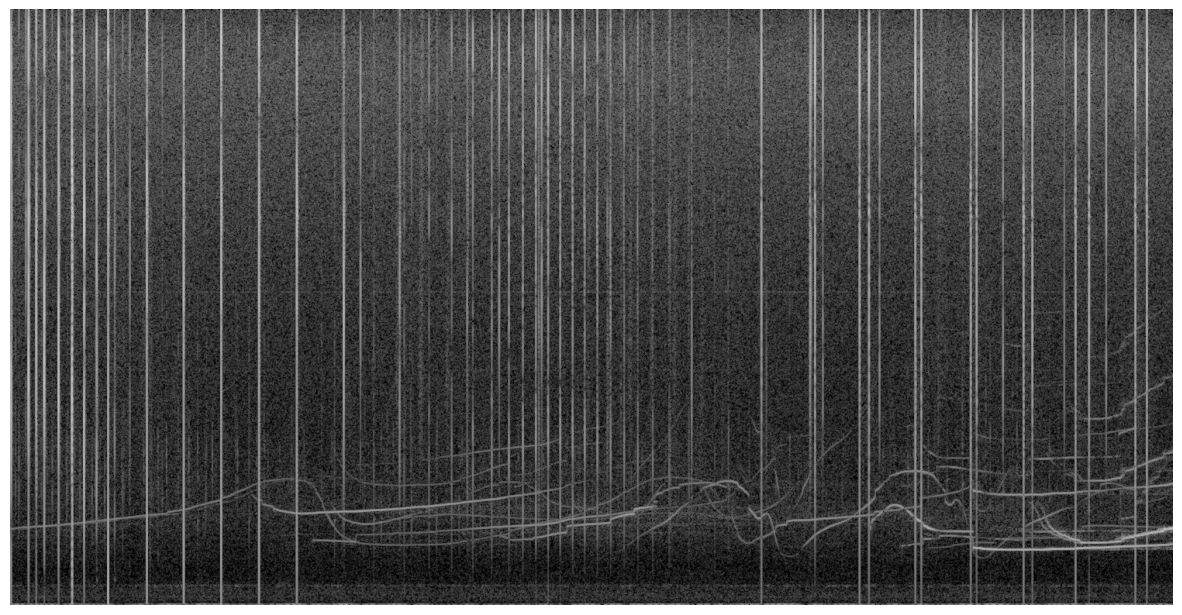

In [56]:
file_name = img_info['file_name']
img = cv2.imread(os.path.join(data_dir, file_name))
plt.figure(figsize=(15, 8))
plt.axis('off')
plt.imshow(img)
plt.show()

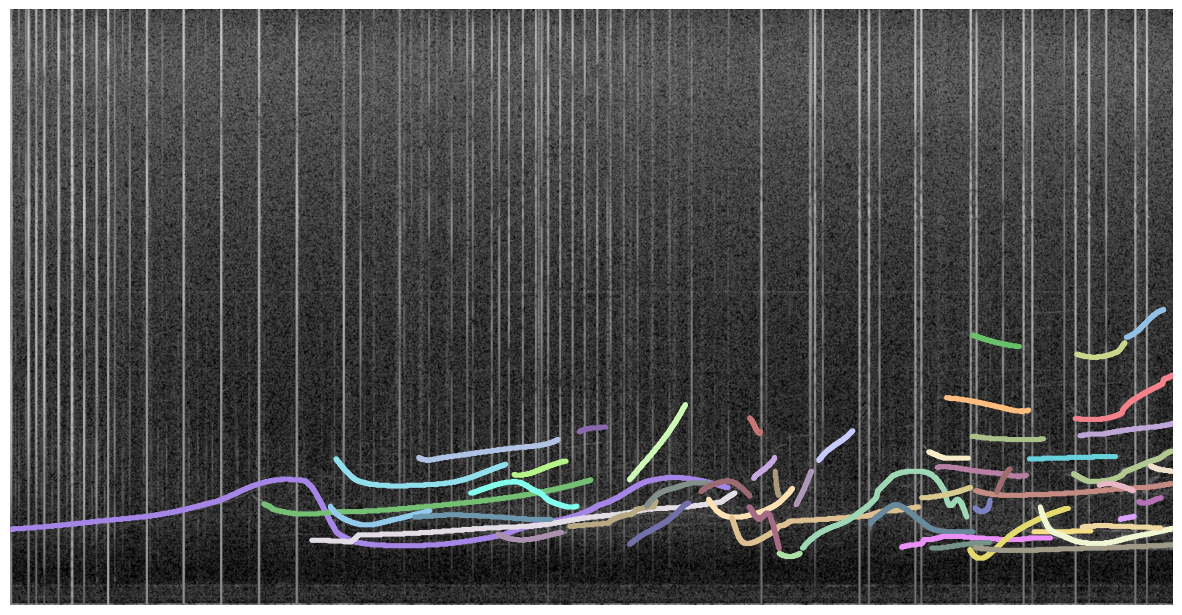

In [57]:
# load and display instance annotations
plt.figure(figsize=(15, 8))
plt.axis('off')
plt.imshow(img) 
annIds = gt_coco.getAnnIds(imgIds=img_info['id'],  iscrowd=None)
anns = gt_coco.loadAnns(annIds)
gt_coco.showAnns(anns)

In [61]:
annIds = mask_coco.getAnnIds(imgIds=img_info['id'],  iscrowd=None)

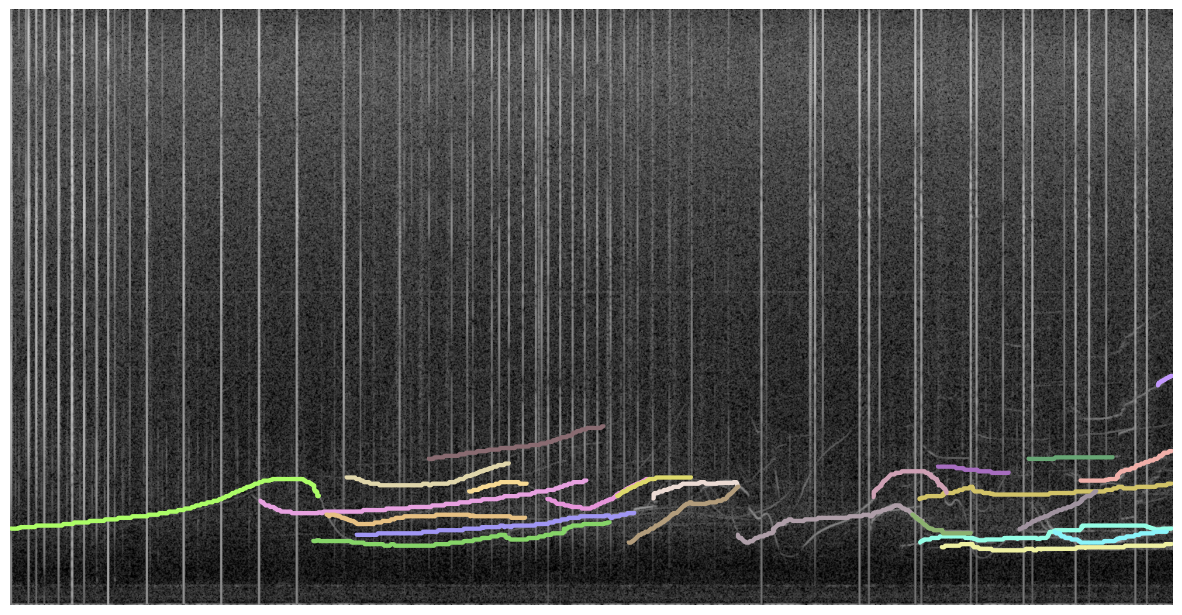

In [62]:
plt.figure(figsize=(15, 8))
plt.axis('off')
plt.imshow(img)
anns = copy.deepcopy(mask_coco.loadAnns(annIds))
for ann in anns:
    mask = maskUtils.decode(ann['segmentation'])
    area = float((mask > 0.0).sum())
    segm = mask_to_polygons(mask)
    ann['segmentation'] = segm
    ann['area'] = area
mask_coco.showAnns(anns)

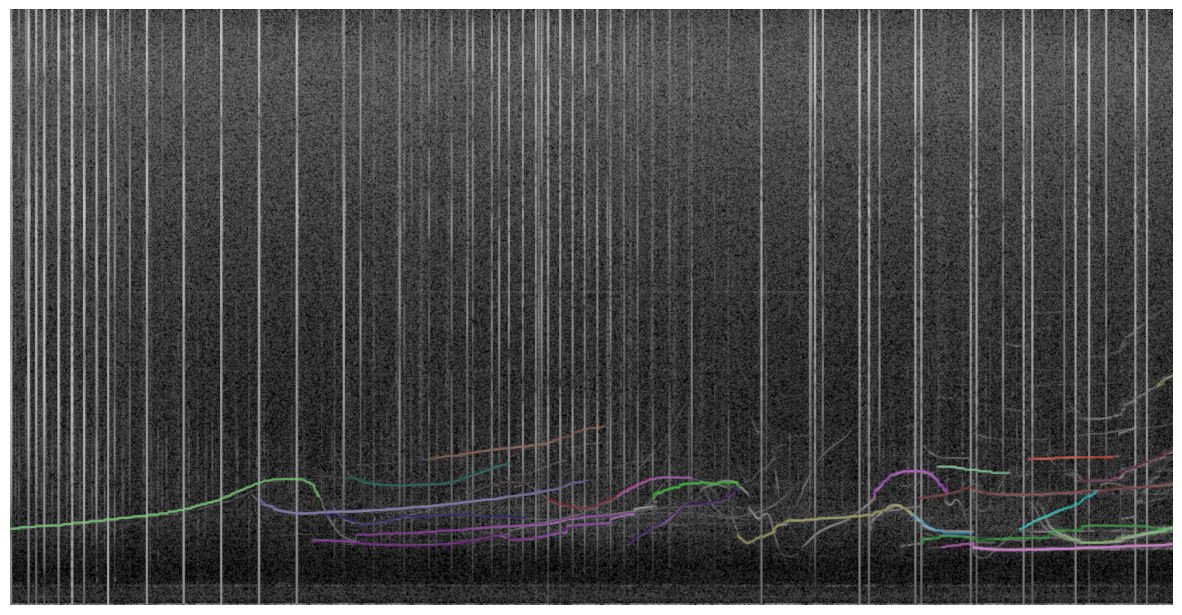

In [63]:
# load and display instance annotations
plt.figure(figsize=(15, 8))
plt.axis('off')
plt.imshow(img)
anns = copy.deepcopy(mask_coco.loadAnns(annIds))
mask_coco.showAnns(anns)